# Customer Behavior Analysis

Customer Segmentation Using K-means clustering and Customer Behavior Analysis

- Cohort Analysis
- Calculate Retention Rate
- Recency, Frequency, Monetary Analysis
- Customer Segmentation

In [1]:
import pandas as pd
import numpy as np

online = pd.read_csv('online.csv', parse_dates=["InvoiceDate"])
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [2]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
Unnamed: 0     70864 non-null int64
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB


## Cohort Analysis

### Assign Monthly Acquisition Cohort

In [3]:
import datetime as dt

def get_month(x): return dt.datetime(x.year, x.month, 1)
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


### Calculate time offset (month)

In [4]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month


invoice_year, invoice_month = get_date_int(online, 'InvoiceMonth')


cohort_year, cohort_month, = get_date_int(online, 'CohortMonth')

In [5]:

years_diff = invoice_year - cohort_year

months_diff = invoice_month - cohort_month


# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff * 1
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom   2011-10-01   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom   2011-11-01   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom   2011-07-01   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom   2011-11-01   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom   2011-05-01   

  CohortMonth  CohortIndex  
0  2011-04-01        

### Calculate Customer Retention For Every Month

- How many customers originally in each cohort?
- How many of them were active in following months?

In [6]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')


cohort_sizes = cohort_counts.iloc[:,0]


retention = cohort_counts.divide(cohort_sizes, axis=0)

retention

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


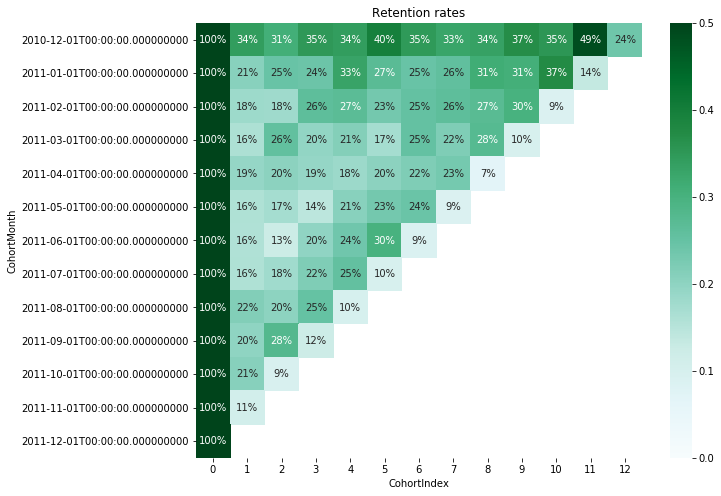

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Retention rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')

plt.show()

### Calculate Average Price Using Cohort Analysis

- Calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.


In [8]:
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()


cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   0    1    2    3    4    5    6    7    8    9    10   11   12
CohortMonth                                                                 
2010-12-01   3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01-01   3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02-01   3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03-01   3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04-01   3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05-01   3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06-01   2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01   3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01   2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01   2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01   2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

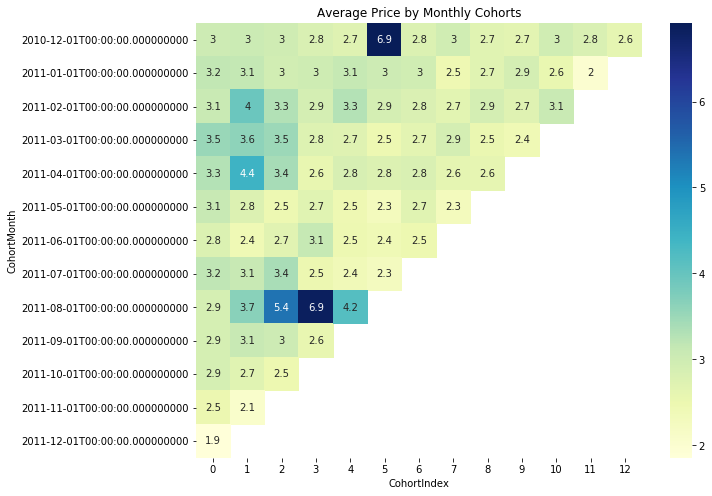

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Average Price by Monthly Cohorts')

sns.heatmap(data = average_price,
           annot = True,
           cmap = 'YlGnBu')

plt.show()

### Calculate Average Quantity Using Cohort Analysis
- Calculate the average quantity metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [10]:
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price 
cohort_data = grouping['Quantity'].mean()


cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
print(average_quantity.round(1))

CohortIndex    0     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                     
2010-12-01   11.1  12.3  12.2  13.2  13.7  11.3  10.6  12.8  13.2  13.0  14.5   
2011-01-01   10.9  10.8  10.0  10.1  14.3  13.2  17.4  16.4  18.7  10.2  10.7   
2011-02-01   12.1  14.3  10.6  11.5  17.5  12.2  17.3  13.2  13.4  15.9  14.3   
2011-03-01    9.6  14.2  13.0  10.2  16.1  12.7  11.6  11.5   9.0   9.6   NaN   
2011-04-01    9.9  11.1  12.4  11.5  11.4   7.7  10.4   9.4   6.6   NaN   NaN   
2011-05-01   14.1   9.6  15.3  11.6  11.9   8.5   9.8   7.3   NaN   NaN   NaN   
2011-06-01   10.6  16.1  18.1  11.2  12.4   7.2   9.7   NaN   NaN   NaN   NaN   
2011-07-01   10.9  16.4   5.6  10.1   6.2   7.0   NaN   NaN   NaN   NaN   NaN   
2011-08-01   10.5   7.4   5.5   5.7   6.0   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09-01   11.5   6.3   8.4   9.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01    9.3   7.5   6.

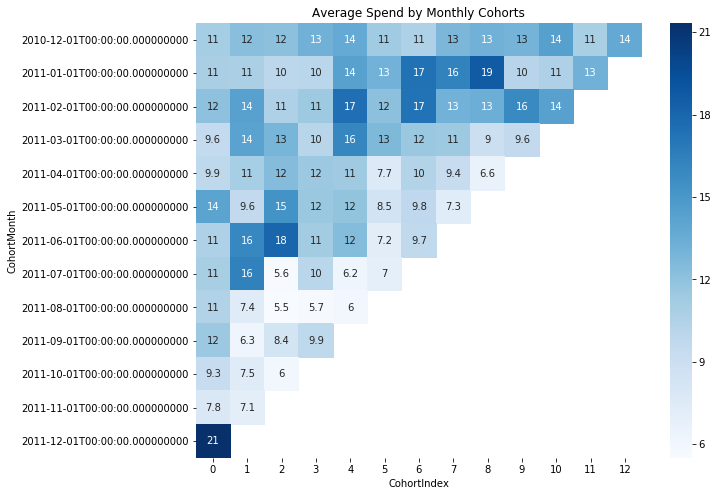

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Average Spend by Monthly Cohorts')

sns.heatmap(data = average_quantity,
           annot = True,
           cmap = 'Blues')

plt.show()

### Behavioral Customer Segmentation

Behavioral Customer Segmentation based on three metrics:
- Recency(R)
- Frequency(F)
- Monetary Value(M)




In [12]:
datamart = pd.read_csv('rfm_datamart.csv')

r_labels = range(3, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new columns R, F and M
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
0,12747,3,25,948.70,3,3,3,9.0
1,12748,1,888,7046.16,3,3,3,9.0
2,12749,4,37,813.45,3,3,3,9.0
3,12820,4,17,268.02,3,3,3,9.0
4,12822,71,9,146.15,2,2,2,6.0


In [13]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9)):
        return 'Middle'
    else:
        return 'Low'


datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with the top 10 rows
print(datamart.head(10))

   CustomerID  Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
0       12747        3         25         948.70  3  3  3        9.0       Top
1       12748        1        888        7046.16  3  3  3        9.0       Top
2       12749        4         37         813.45  3  3  3        9.0       Top
3       12820        4         17         268.02  3  3  3        9.0       Top
4       12822       71          9         146.15  2  2  2        6.0    Middle
5       12823      297          1         306.00  1  1  3        5.0       Low
6       12824       60          6         106.38  2  2  2        6.0    Middle
7       12826        3         16         272.66  3  3  3        9.0       Top
8       12827       33          2          44.55  2  1  1        4.0       Low
9       12828        8         12         195.40  3  2  2        7.0    Middle


### Analyze RFM for custom segments

- Analyze average values of Recency, Frequency and MonetaryValue for the custom segments

In [14]:
# Calculate average values for each RFM_Level
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  

    'MonetaryValue': ['mean', 'count']
}).round(1)


print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         153.4       4.4          86.9  1627
Middle       50.8      18.0         332.1  1450
Top          10.7      61.5        1285.3   566


## Customer Segmentation Using K-mean clustering
### Preprocessing

In [15]:
datamart = pd.read_csv('rfm_datamart.csv')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Apply log transformation
datamart_log = np.log(datamart)

# Initialize StandardScaler
scaler = StandardScaler()
datamart_normalized = scaler.fit_transform(datamart_log)


### Calculate and plot sum of squared errors

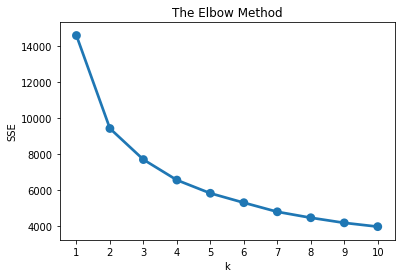

In [16]:
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_normalized)
    sse[k] = kmeans.inertia_ 

plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

n_cluster = 4 would be great 

In [17]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### Analyze Customer Segments - Recency, Frequency, MonetaryValue

In [18]:
# Create a new DataFrame by adding a cluster label column
datamart_k4 = datamart.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_k4.groupby(['Cluster'])

# Calculate average RFM values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
  }).round(1)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,108.6,8.6,162.7
1,167.7,2.7,44.4
2,16.5,52.0,1105.6
3,70.2,14.5,240.6
